In [53]:
import math
from logging import debug

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from math import sqrt,ceil
from scipy.stats import linregress
import libraries as lib

In [55]:
# Define each directory for the required paths with updated paths
directory2 = "../../../OneDrive - HvA/Logfiles/SOLAR/2024/2024-10-24_sleeptest/0056 - 20241024T115530 1h25m5s 12.315km De Rijp - Uitgeest - De Rijp"
# Process each directory with lib.DataUitzoekenGui
result2 = lib.DataUitzoekenGui(directory2)

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '1_Master_08_05.csv', '2_MPPT_0_05_05.csv', '3_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

In [56]:
# Na het laden van de bestanden en het klikken op de knop
# Controleer of 'merged_df' in result zit
if 'merged_df' in result2:
    merged_df = result2['merged_df'].copy()
    # Gebruik merged_df zoals je wilt
else:
    print("De data is nog niet geladen.")
merged_df

,1_Datalogger port,"1_Dataloggertijd, in s",1_Cycle count,1_Tijd,1_Latitude,1_Longitude,1_Snelheid over de grond in km/h,1_Richting van de snelheid,1_Datum,1_Magnetische variatie,...,"2_Externe ingangsspanning, in V","2_Spanning op V_Analog, in V","2_Spanning op de supercaps, in V","2_Externe temperatuur, in graden Celsius","2_Interne temperatuur, in graden Celsius","2_Laadstroom van de supercaps, in mA","2_Stroom door de load cell, in mA",2_Datalogger port,2_Format header (>21|02),"2_Load cell interface tijd, in s"
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:02:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.293000,5.071200,5.758200,0.027200,24.305200,38.700000,12.1,B,21|02,3554.85
0 days 00:02:20,9.0,140.4098,145.861,95531.0,5233.2842,446.5866,3.9,324.9,241024.0,NaN,...,1.293000,5.072000,5.759400,0.027200,24.311800,38.740000,12.1,B,21|02,3555.75
0 days 00:02:21,9.0,141.4102,146.860,95532.0,5233.2847,446.5861,3.9,325.2,241024.0,NaN,...,1.293500,5.075000,5.762333,0.027333,24.324833,38.766667,12.1,B,21|02,3556.65
0 days 00:02:22,9.0,142.4364,147.886,95533.0,5233.2850,446.5858,3.9,325.3,241024.0,NaN,...,1.292857,5.075857,5.762714,0.027143,24.328857,38.714286,12.1,B,21|02,3557.70
0 days 00:02:23,9.0,143.4079,148.859,95534.0,5233.2856,446.5850,3.9,324.7,241024.0,NaN,...,1.292667,5.075833,5.763167,0.027167,24.333167,38.700000,12.1,B,21|02,3558.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 01:27:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.320857,5.078000,5.764714,0.027000,25.531714,38.742857,12.1,B,21|02,8667.60
0 days 01:27:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.320857,5.078571,5.764857,0.027429,25.528429,38.771429,12.1,B,21|02,8668.65
0 days 01:27:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.320333,5.077333,5.764167,0.027000,25.527667,38.766667,12.1,B,21|02,8669.70


In [57]:
# Convert '1_Tijd' from HHMMSS format to seconds since midnight
def hhmmss_to_seconds(hhmmss):
    hours = hhmmss // 10000
    minutes = (hhmmss % 10000) // 100
    seconds = hhmmss % 100
    return hours * 3600 + minutes * 60 + seconds

# Apply conversion to the time column
merged_df['Time_in_seconds'] = merged_df['1_Tijd'].apply(hhmmss_to_seconds)

#filter de data vanaf tijdstip 170000 tot 190000
#filter the data where snelheid over the grond or snelheid tenopzichte van het water is not 0 and snelheid ten opzichte van het water is lower then 20
merged_df = merged_df[merged_df['1_Snelheid over de grond in km/h'] > 0]
merged_df = merged_df[merged_df['1_Snelheid tenopzichte van het water in Kilometers per uur'] > 0]
merged_df = merged_df[merged_df['Time_in_seconds'] < 38000]
merged_df = merged_df[merged_df['Time_in_seconds'] > 36750]

display(merged_df)
lib.plot_trajectory_map(merged_df['1_Latitude'].dropna(), merged_df['1_Longitude'].dropna(), merged_df['1_Snelheid over de grond in km/h'].dropna())

,1_Datalogger port,"1_Dataloggertijd, in s",1_Cycle count,1_Tijd,1_Latitude,1_Longitude,1_Snelheid over de grond in km/h,1_Richting van de snelheid,1_Datum,1_Magnetische variatie,...,"2_Spanning op V_Analog, in V","2_Spanning op de supercaps, in V","2_Externe temperatuur, in graden Celsius","2_Interne temperatuur, in graden Celsius","2_Laadstroom van de supercaps, in mA","2_Stroom door de load cell, in mA",2_Datalogger port,2_Format header (>21|02),"2_Load cell interface tijd, in s",Time_in_seconds
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:19:20,9.0,1160.4552,1166.060,101231.0,5233.2851,446.5614,7.2,117.2,241024.0,NaN,...,5.068667,5.754167,0.026667,24.203000,38.700000,12.100000,B,21|02,4575.75,36751.0
0 days 00:19:21,9.0,1161.4551,1167.059,101232.0,5233.2846,446.5631,7.4,116.1,241024.0,NaN,...,5.070429,5.756429,0.026714,24.208286,38.742857,12.100000,B,21|02,4576.65,36752.0
0 days 00:19:22,9.0,1162.4919,1168.095,101233.0,5233.2841,446.5649,7.2,114.2,241024.0,NaN,...,5.070286,5.756571,0.026571,24.205571,38.742857,12.100000,B,21|02,4577.70,36753.0
0 days 00:19:23,9.0,1163.4569,1169.060,101234.0,5233.2838,446.5666,7.4,112.7,241024.0,NaN,...,5.067667,5.753500,0.026333,24.193500,38.733333,12.100000,B,21|02,4578.75,36754.0
0 days 00:19:24,9.0,1164.4660,1170.069,101235.0,5233.2835,446.5684,7.4,110.7,241024.0,NaN,...,5.068857,5.754857,0.026143,24.190857,38.742857,12.071429,B,21|02,4579.65,36755.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 00:40:04,9.0,2404.4745,2410.265,103315.0,5233.3495,446.2886,26.9,299.2,241024.0,NaN,...,5.072000,5.758500,0.026667,24.520833,38.733333,12.100000,B,21|02,5819.70,37995.0
0 days 00:40:05,9.0,2405.4386,2411.229,103316.0,5233.3514,446.2828,26.9,298.4,241024.0,NaN,...,5.073714,5.760857,0.026857,24.525143,38.700000,12.100000,B,21|02,5820.60,37996.0
0 days 00:40:06,9.0,2406.4388,2412.229,103317.0,5233.3532,446.2772,26.9,297.5,241024.0,NaN,...,5.075286,5.761857,0.026857,24.529000,38.757143,12.100000,B,21|02,5821.65,37997.0


Animation saved as dynamic_lat_lon_acceleration_with_dark_mode.html with dark mode


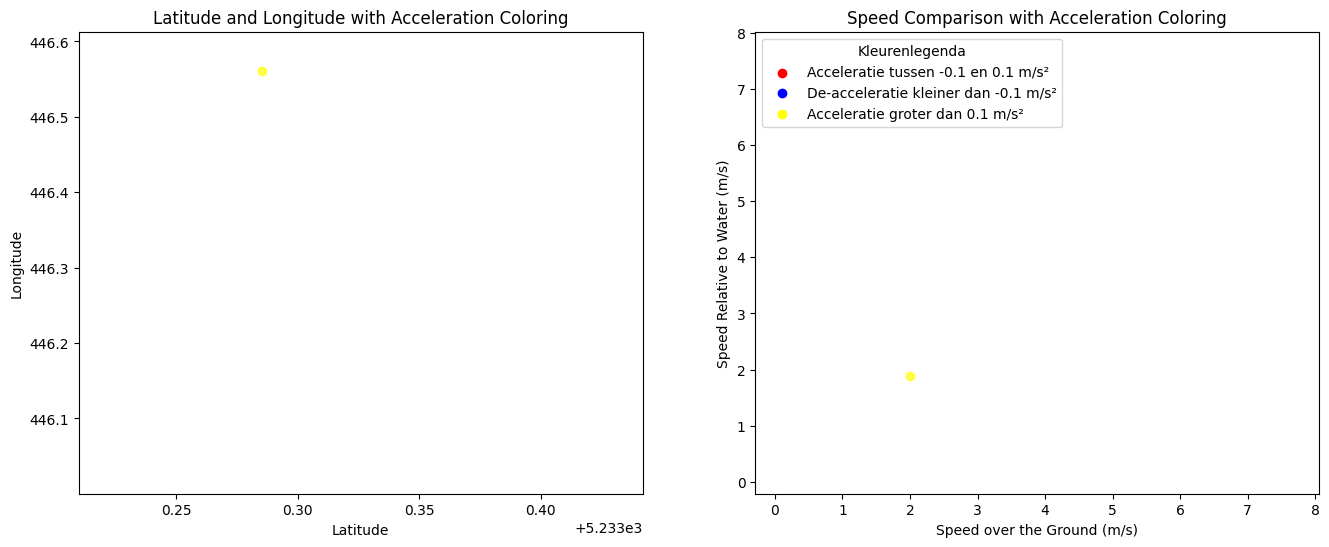

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Convert speeds to m/s
merged_df['1_Speed_over_ground_m/s'] = merged_df['1_Snelheid over de grond in km/h'] / 3.6
merged_df['1_Speed_relative_to_water_m/s'] = merged_df['1_Snelheid tenopzichte van het water in Kilometers per uur'] / 3.6

# Calculate acceleration (difference in speed over ground)
merged_df['1_Acceleration'] = merged_df['1_Speed_over_ground_m/s'].diff()

# Prepare the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Set up the latitude-longitude plot
ax1.set_xlim(merged_df['1_Latitude'].min() - 0.01, merged_df['1_Latitude'].max() + 0.01)
ax1.set_ylim(merged_df['1_Longitude'].min() - 0.01, merged_df['1_Longitude'].max() + 0.01)
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Longitude")
ax1.set_title("Latitude and Longitude with Acceleration Coloring")

# Set up the speed comparison plot
ax2.set_xlim(merged_df['1_Speed_over_ground_m/s'].min() - 0.5, 
             merged_df['1_Speed_over_ground_m/s'].max() + 0.5)
ax2.set_ylim(merged_df['1_Speed_relative_to_water_m/s'].min() - 0.5, 
             merged_df['1_Speed_relative_to_water_m/s'].max() + 0.5)
ax2.set_xlabel("Speed over the Ground (m/s)")
ax2.set_ylabel("Speed Relative to Water (m/s)")
ax2.set_title("Speed Comparison with Acceleration Coloring")

# Initialize scatter plots
scat1 = ax1.scatter([], [], alpha=0.7)
scat2 = ax2.scatter([], [], alpha=0.7)

# Add a legend for acceleration categories
legend_labels = [
    ('red', 'Acceleratie tussen -0.1 en 0.1 m/s²'),
    ('blue', 'De-acceleratie kleiner dan -0.1 m/s²'),
    ('yellow', 'Acceleratie groter dan 0.1 m/s²')
]
for color, label in legend_labels:
    ax2.scatter([], [], color=color, label=label)  # Dummy points for legend
ax2.legend(title="Kleurenlegenda", loc='upper left')

# Define the update function
def update(frame):
    end = frame + 1  # Display one additional row per frame
    if end > len(merged_df):  # Stop when all data is shown
        return

    # Extract data chunk
    chunk = merged_df.iloc[:end]  # Include all data up to the current frame
    
    # Determine colors for acceleration
    colors = chunk['1_Acceleration'].apply(
        lambda a: 'red' if -0.1 <= a <= 0.1 else ('blue' if a < -0.1 else 'yellow')
    )

    # Update the latitude-longitude scatter plot
    chunk_lat = chunk['1_Latitude']
    chunk_lon = chunk['1_Longitude']
    scat1.set_offsets(np.column_stack((chunk_lat, chunk_lon)))
    scat1.set_color(colors)
    
    # Update the speed comparison plot
    scat2.set_offsets(np.column_stack((chunk['1_Speed_over_ground_m/s'],
                                        chunk['1_Speed_relative_to_water_m/s'])))
    scat2.set_color(colors)

# Adjust the animation settings
frames_count = len(merged_df)  # Total number of frames is equal to the number of rows
anim = FuncAnimation(fig, update, frames=frames_count, repeat=False, interval=5)  # Slower animation with 5ms per frame

# Custom dark mode CSS
dark_mode_css = """
<style>
    body {
        background-color: #121212;
        color: white;
    }
    .animation-container {
        background-color: #121212;
        border: 2px solid #ffffff;
        border-radius: 10px;
        padding: 20px;
    }
</style>
"""

# Save as an HTML file
output_path = "dynamic_lat_lon_acceleration_with_dark_mode.html"
from matplotlib.animation import HTMLWriter
writer = HTMLWriter()
anim.save(output_path, writer=writer)

# Append the dark mode CSS to the HTML
with open(output_path, 'a') as f:
    f.write(dark_mode_css)

print(f"Animation saved as {output_path} with dark mode")
